In [1]:
import pandas as pd
import plotly.graph_objects as go
from collections import deque
from IPython.display import display, HTML

In [2]:
trades_wn_dn1 = pd.read_csv('trades_round_1_day_-1_wn.csv', delimiter=';')
trades_wn_dn2 = pd.read_csv('trades_round_1_day_-2_wn.csv', delimiter=';')
trades_wn_d0 = pd.read_csv('trades_round_1_day_0_wn.csv', delimiter=';')

trades_r3_d0 = pd.read_csv('trades_round_3_day_0_wn.csv', delimiter=';')
trades_r3_d1 = pd.read_csv('trades_round_3_day_1_wn.csv', delimiter=';')
trades_r3_d2 = pd.read_csv('trades_round_3_day_2_wn.csv', delimiter=';')

trades_r4_d1 = pd.read_csv('trades_round_4_day_1_wn.csv', delimiter=';')
trades_r4_d2 = pd.read_csv('trades_round_4_day_2_wn.csv', delimiter=';')
trades_r4_d3 = pd.read_csv('trades_round_4_day_3_wn.csv', delimiter=';')

In [5]:
prices_r1_dn1 = pd.read_csv('../data2024/island-data-bottle-round-1/prices_round_1_day_-1.csv', delimiter=';')
prices_r1_dn2 = pd.read_csv('../data2024/island-data-bottle-round-1/prices_round_1_day_-2.csv', delimiter=';')
prices_r1_d0 = pd.read_csv('../data2024/island-data-bottle-round-1/prices_round_1_day_0.csv', delimiter=';')

prices_r3_d0 = pd.read_csv('../data2024/island-data-bottle-round-3/prices_round_3_day_0.csv', delimiter=';')
prices_r3_d1 = pd.read_csv('../data2024/island-data-bottle-round-3/prices_round_3_day_1.csv', delimiter=';')
prices_r3_d2 = pd.read_csv('../data2024/island-data-bottle-round-3/prices_round_3_day_2.csv', delimiter=';')

prices_r4_d1 = pd.read_csv('../data2024/island-data-bottle-round-4/prices_round_4_day_1.csv', delimiter=';')
prices_r4_d2 = pd.read_csv('../data2024/island-data-bottle-round-4/prices_round_4_day_2.csv', delimiter=';')
prices_r4_d3 = pd.read_csv('../data2024/island-data-bottle-round-4/prices_round_4_day_3.csv', delimiter=';')

In [6]:
prices_r1_d0

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [29]:
trades_wn_d0

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,Rhianna,Valentina,STARFRUIT,SEASHELLS,5041.0,4
1,100,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
2,300,Valentina,Rhianna,AMETHYSTS,SEASHELLS,9998.0,2
3,300,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
4,300,Valentina,Ruby,STARFRUIT,SEASHELLS,5037.0,6
...,...,...,...,...,...,...,...
5312,998800,Valentina,Remy,STARFRUIT,SEASHELLS,5050.0,1
5313,998800,Rhianna,Remy,AMETHYSTS,SEASHELLS,10002.0,1
5314,999500,Valentina,Remy,AMETHYSTS,SEASHELLS,9995.0,2
5315,999500,Valentina,Remy,STARFRUIT,SEASHELLS,5049.0,2


In [58]:
def plot_trades(df_trades, df_prices, trader_name, product_name):
    buys = df_trades[(df_trades['buyer'] == trader_name) & (df_trades['symbol'] == product_name)]
    sells = df_trades[(df_trades['seller'] == trader_name) & (df_trades['symbol'] == product_name)]
    mid_prices = df_prices[df_prices['product'] == product_name]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=buys['timestamp'], y=buys['price'], mode='markers', name='Buys', marker=dict(color='green', size=buys['quantity']**2/5, opacity=0.5)))
    fig.add_trace(go.Scatter(x=sells['timestamp'], y=sells['price'], mode='markers', name='Sells', marker=dict(color='red', size=sells['quantity']**2/5, opacity=0.5)))
    fig.add_trace(go.Scatter(x=mid_prices['timestamp'], y=mid_prices['mid_price'], mode='lines', name='Mid Price', line=dict(color='blue', width=2)))

    fig.update_layout(title=f'Trades for {trader_name} on {product_name}',
                      xaxis_title='Timestamp',
                      yaxis_title='Price',
                      legend_title='Transaction Type')
    fig.show()

In [59]:
def plot_realized_pl(df, trader_name, product_name):
    buys = df[(df['buyer'] == trader_name) & (df['symbol'] == product_name)].copy()
    buys['type'] = 'buy'
    buys['quantity'] = buys['quantity']
    
    sells = df[(df['seller'] == trader_name) & (df['symbol'] == product_name)].copy()
    sells['type'] = 'sell'
    sells['quantity'] = -sells['quantity']  # Treat sells as negative for uniform handling
    
    transactions = pd.concat([buys, sells])
    transactions.sort_values('timestamp', inplace=True)

    positions = deque()
    realized_pl = []
    pl_total = 0

    for _, transaction in transactions.iterrows():
        transaction_quantity = transaction['quantity']
        transaction_price = transaction['price']
        transaction_timestamp = transaction['timestamp']

        while transaction_quantity != 0:
            if not positions:
                positions.append({'quantity': transaction_quantity, 'price': transaction_price})
                break

            position = positions[0]
            if (position['quantity'] > 0 and transaction_quantity < 0) or (position['quantity'] < 0 and transaction_quantity > 0):
                quantity_to_close = min(abs(transaction_quantity), abs(position['quantity']))
                pl = quantity_to_close * (abs(transaction_price) - abs(position['price']))
                if position['quantity'] < 0:
                    pl = -pl

                pl_total += pl
                realized_pl.append({'timestamp': transaction_timestamp, 'P&L': pl_total})

                position['quantity'] += transaction_quantity
                if position['quantity'] == 0:
                    positions.popleft()  # Remove closed position
                transaction_quantity += quantity_to_close if transaction_quantity < 0 else -quantity_to_close
            else:
                positions.append({'quantity': transaction_quantity, 'price': transaction_price})
                break

    pl_df = pd.DataFrame(realized_pl)
    if not pl_df.empty:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=pl_df['timestamp'], y=pl_df['P&L'], mode='lines+markers', name='Realized P&L'))
        fig.update_layout(title=f'Realized P&L for {trader_name} on {product_name}',
                          xaxis_title='Timestamp',
                          yaxis_title='Profit and Loss',
                          legend_title='P&L')
        fig.show()
    else:
        print("No completed transactions to calculate realized P&L.")


In [60]:
def analyze_trades(df_trades, df_prices):
    def get_unique_symbols(df):
        return df['symbol'].unique()
    
    def get_unique_traders(df):
        buyers = df['buyer'].unique()
        sellers = df['seller'].unique()
        return set(buyers).union(set(sellers))
    
    def get_buys(df, trader_name):
        return df[df['buyer'] == trader_name]

    def get_sells(df, trader_name):
        return df[df['seller'] == trader_name]

    unique_traders = get_unique_traders(df_trades)
    unique_symbols = get_unique_symbols(df_trades)

    for trader in unique_traders:
        for symbol in unique_symbols:
            print(f"\nTrader: {trader}, Symbol: {symbol}")
            buys = get_buys(df_trades, trader)
            sells = get_sells(df_trades, trader)

            buys = buys[buys['symbol'] == symbol]
            sells = sells[sells['symbol'] == symbol]

            if not buys.empty:
                print("Buys:")
                display(buys)
            else:
                print("No buys for this product.")

            if not sells.empty:
                print("Sells:")
                display(sells)
            else:
                print("No sells for this product.")

            if not buys.empty or not sells.empty:
                plot_trades(df_trades, df_prices, trader, symbol)

            if not buys.empty and not sells.empty:
                plot_realized_pl(df_trades, trader, symbol)
            else:
                print("Not enough data to calculate realized P&L.")


In [8]:
# copypaste into the cell below to see 1 at a time
"""
analyze_trades(trades_wn_dn2, prices_r1_dn2)
analyze_trades(trades_wn_dn1, prices_r1_dn1)
analyze_trades(trades_wn_d0, prices_r1_d0)

analyze_trades(trades_r3_d0, prices_r3_d0)
analyze_trades(trades_r3_d1, prices_r3_d1)
analyze_trades(trades_r3_d2, prices_r3_d2)

analyze_trades(trades_r4_d1, prices_r4_d1)
analyze_trades(trades_r4_d2, prices_r4_d2)
analyze_trades(trades_r4_d3, prices_r4_d3)
"""

'\nanalyze_trades(trades_wn_dn2, prices_r1_dn2)\nanalyze_trades(trades_wn_dn1, prices_r1_dn1)\nanalyze_trades(trades_wn_d0, prices_r1_d0)\n\nanalyze_trades(trades_r3_d0, prices_r3_d0)\nanalyze_trades(trades_r3_d1, prices_r3_d1)\nanalyze_trades(trades_r3_d2, prices_r3_d2)\n\nanalyze_trades(trades_r4_d1, prices_r4_d1)\nanalyze_trades(trades_r4_d2, prices_r4_d2)\nanalyze_trades(trades_r4_d3, prices_r4_d3)\n'


Trader: Remy, Symbol: CHOCOLATE
Buys:


,timestamp,buyer,seller,symbol,currency,price,quantity
2,200,Remy,Vinnie,CHOCOLATE,SEASHELLS,7891.0,8
3,600,Remy,Vinnie,CHOCOLATE,SEASHELLS,7890.0,5
21,6400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7897.0,8
57,15800,Remy,Vinnie,CHOCOLATE,SEASHELLS,7898.0,7
61,16900,Remy,Vinnie,CHOCOLATE,SEASHELLS,7893.0,5
...,...,...,...,...,...,...,...
3739,983700,Remy,Vinnie,CHOCOLATE,SEASHELLS,7755.0,7
3742,985900,Remy,Vinnie,CHOCOLATE,SEASHELLS,7758.0,6
3751,987400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7762.0,7
3761,989400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7763.0,8


Sells:


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,Remy,CHOCOLATE,SEASHELLS,7888.0,8
8,1600,Vinnie,Remy,CHOCOLATE,SEASHELLS,7892.0,8
31,7900,Vinnie,Remy,CHOCOLATE,SEASHELLS,7893.0,8
40,10000,Vinnie,Remy,CHOCOLATE,SEASHELLS,7898.0,8
45,12700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7895.0,7
...,...,...,...,...,...,...,...
3773,992700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7754.0,7
3782,994700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7751.0,6
3789,996700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7749.0,8
3791,997100,Vinnie,Remy,CHOCOLATE,SEASHELLS,7747.0,8


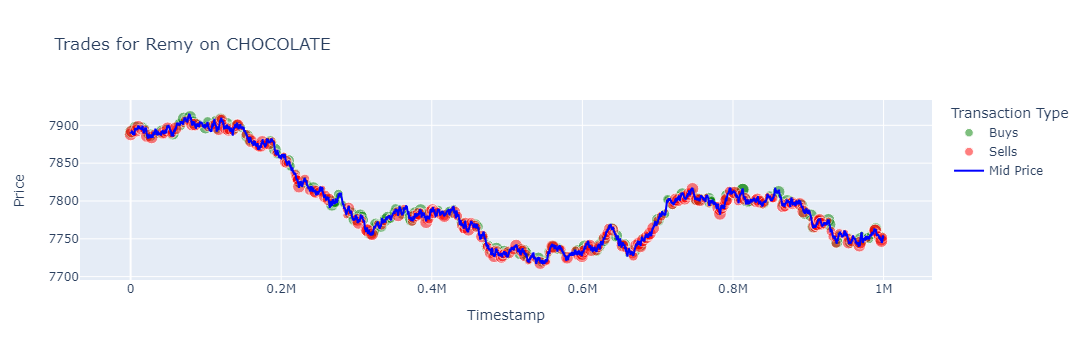

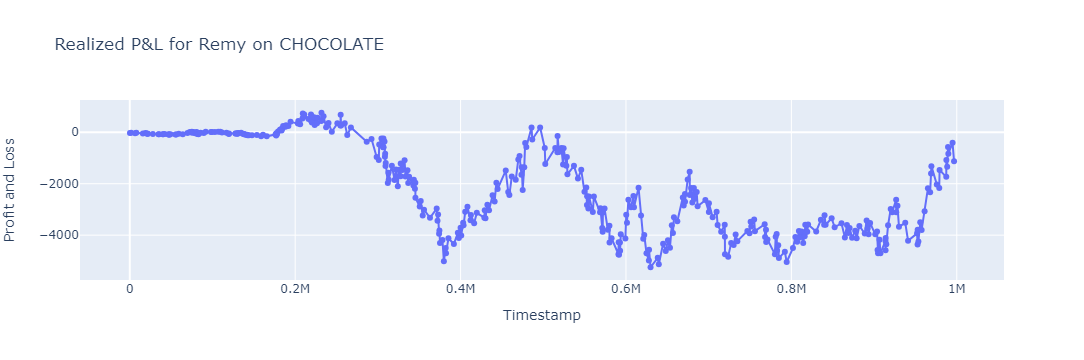


Trader: Vinnie, Symbol: CHOCOLATE
Buys:


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,Remy,CHOCOLATE,SEASHELLS,7888.0,8
8,1600,Vinnie,Remy,CHOCOLATE,SEASHELLS,7892.0,8
15,5000,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7887.0,4
24,7100,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7895.0,7
25,7200,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7894.0,5
...,...,...,...,...,...,...,...
3779,994000,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7751.0,6
3782,994700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7751.0,6
3789,996700,Vinnie,Remy,CHOCOLATE,SEASHELLS,7749.0,8
3791,997100,Vinnie,Remy,CHOCOLATE,SEASHELLS,7747.0,8


Sells:


,timestamp,buyer,seller,symbol,currency,price,quantity
2,200,Remy,Vinnie,CHOCOLATE,SEASHELLS,7891.0,8
3,600,Remy,Vinnie,CHOCOLATE,SEASHELLS,7890.0,5
21,6400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7897.0,8
57,15800,Remy,Vinnie,CHOCOLATE,SEASHELLS,7898.0,7
61,16900,Remy,Vinnie,CHOCOLATE,SEASHELLS,7893.0,5
...,...,...,...,...,...,...,...
3739,983700,Remy,Vinnie,CHOCOLATE,SEASHELLS,7755.0,7
3742,985900,Remy,Vinnie,CHOCOLATE,SEASHELLS,7758.0,6
3751,987400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7762.0,7
3761,989400,Remy,Vinnie,CHOCOLATE,SEASHELLS,7763.0,8


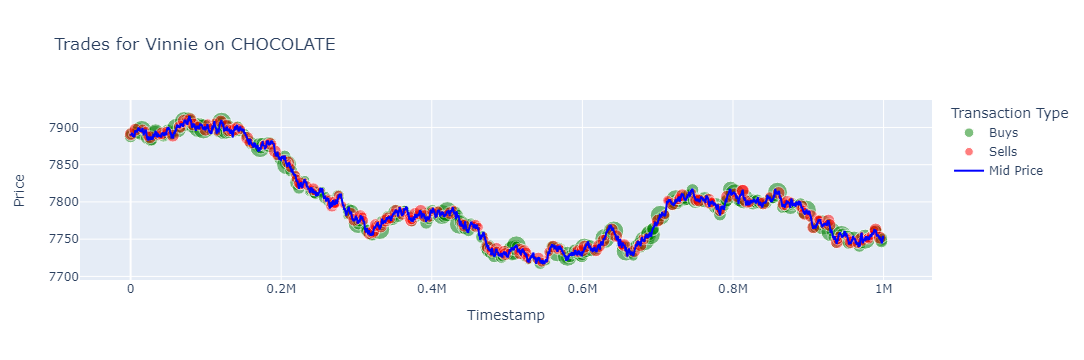

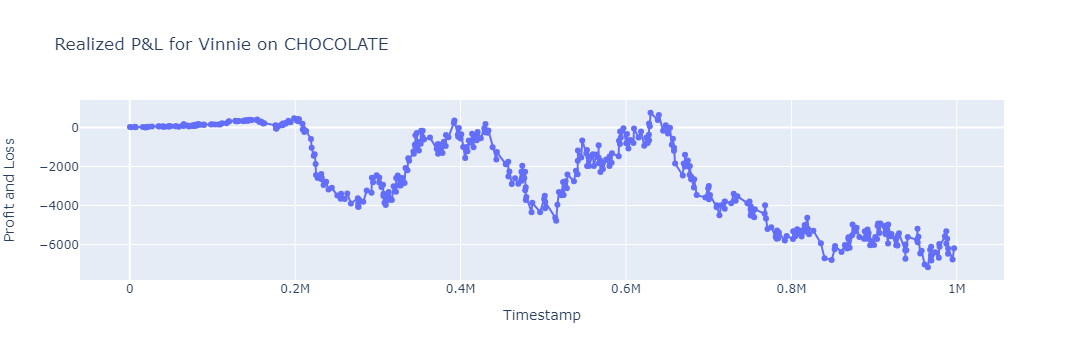


Trader: Vladimir, Symbol: CHOCOLATE
Buys:


,timestamp,buyer,seller,symbol,currency,price,quantity
3606,946100,Vladimir,Remy,CHOCOLATE,SEASHELLS,7753.0,5


Sells:


,timestamp,buyer,seller,symbol,currency,price,quantity
15,5000,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7887.0,4
24,7100,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7895.0,7
25,7200,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7894.0,5
35,9100,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7896.0,5
54,14800,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7896.0,10
...,...,...,...,...,...,...,...
3741,985700,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7758.0,4
3762,989500,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7762.0,6
3763,989700,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7760.0,8
3778,993700,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,7753.0,6


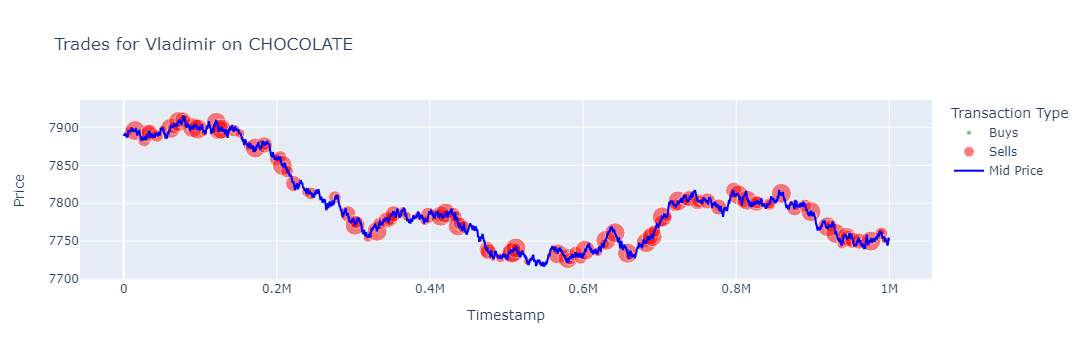

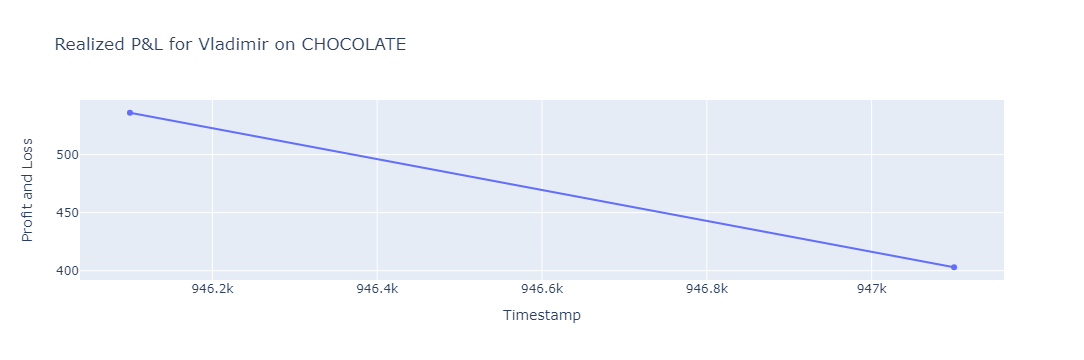

In [67]:
analyze_trades(trades_r3_d2[trades_r3_d2['symbol'].isin(['STRAWBERRIE', 'CHOCOLATE'])], prices_r3_d2[prices_r3_d2['product'].isin(['STRAWBERRIE', 'CHOCOLATE'])])